# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

import openweathermapy as ow
from pprint import pprint


# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
base_url = "http://api.openweathermap.org/data/2.5/weather?appid={}".format(api_key)
units = "imperial"

container_list = []
print("Beginning Data Retrieval")
Record_counter = 1
Set = 1

for i, city in enumerate(cities):
    if(i%10 == 0 and i>=10):
        Set += 1
        Record_counter=0
    query_url = f"{base_url}&q={city}&units={units}"
    print("Processing Record %s of Set %s | %s" %(Record_counter, Set, city)) 
    Record_counter += 1
    try:
        weather=requests.get(query_url).json()

        temp = weather["main"]["temp"]
        date = weather["dt"]
        cntry = weather["sys"]["country"]
        humid = weather["main"]["humidity"]  
        cloud = weather["clouds"]["all"]
        wind = weather["wind"]["speed"]
        lat = weather ["coord"]["lat"]
        lng = weather ["coord"]["lon"]
        container_list.append({
            "City name":city,
            "Date":date,
            "Country":cntry,
            "Temperature":temp,
            "Humidity":humid,
            "Cloud":cloud,
            "Windspeed":wind,
            "Latitude":lat,
            "Longitude":lng 
        })
    except:
        print("City not found. Skipping...")
        pass

Beginning Data Retrieval
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | shache
Processing Record 4 of Set 1 | new norfolk
Processing Record 5 of Set 1 | tupiza
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | innisfail
Processing Record 8 of Set 1 | arlit
Processing Record 9 of Set 1 | mareeba
Processing Record 10 of Set 1 | coquimbo
Processing Record 0 of Set 2 | kununurra
Processing Record 1 of Set 2 | dwarka
Processing Record 2 of Set 2 | camacha
Processing Record 3 of Set 2 | grand river south east
City not found. Skipping...
Processing Record 4 of Set 2 | dingalan
Processing Record 5 of Set 2 | polyarnyy
Processing Record 6 of Set 2 | severo-kurilsk
Processing Record 7 of Set 2 | tagusao
Processing Record 8 of Set 2 | laguna
Processing Record 9 of Set 2 | airai
Processing Record 0 of Set 3 | busselton
Processing Record 1 of Set 3 | iqaluit
Processing Record 2 of Set 3 | san patricio
Processing R

Processing Record 6 of Set 19 | namibe
Processing Record 7 of Set 19 | naze
Processing Record 8 of Set 19 | araioses
Processing Record 9 of Set 19 | pacific grove
Processing Record 0 of Set 20 | kindu
Processing Record 1 of Set 20 | nizhneyansk
City not found. Skipping...
Processing Record 2 of Set 20 | jazzin
City not found. Skipping...
Processing Record 3 of Set 20 | umzimvubu
City not found. Skipping...
Processing Record 4 of Set 20 | longyearbyen
Processing Record 5 of Set 20 | lewistown
Processing Record 6 of Set 20 | naryan-mar
Processing Record 7 of Set 20 | ust-karsk
Processing Record 8 of Set 20 | omsukchan
Processing Record 9 of Set 20 | guane
Processing Record 0 of Set 21 | pimentel
Processing Record 1 of Set 21 | alice springs
Processing Record 2 of Set 21 | old town
Processing Record 3 of Set 21 | werota
Processing Record 4 of Set 21 | kruisfontein
Processing Record 5 of Set 21 | sungairaya
Processing Record 6 of Set 21 | ahtopol
Processing Record 7 of Set 21 | saint-phili

Processing Record 3 of Set 38 | urumqi
City not found. Skipping...
Processing Record 4 of Set 38 | beira
Processing Record 5 of Set 38 | dharchula
Processing Record 6 of Set 38 | lumphat
Processing Record 7 of Set 38 | port hedland
Processing Record 8 of Set 38 | cortez
Processing Record 9 of Set 38 | booue
Processing Record 0 of Set 39 | ovsyanka
Processing Record 1 of Set 39 | dusti
Processing Record 2 of Set 39 | beringovskiy
Processing Record 3 of Set 39 | kralendijk
Processing Record 4 of Set 39 | kabinda
Processing Record 5 of Set 39 | chapais
Processing Record 6 of Set 39 | kissimmee
Processing Record 7 of Set 39 | alice town
Processing Record 8 of Set 39 | hualmay
Processing Record 9 of Set 39 | taoudenni
Processing Record 0 of Set 40 | zhitikara
City not found. Skipping...
Processing Record 1 of Set 40 | vrangel
Processing Record 2 of Set 40 | seshcha
Processing Record 3 of Set 40 | staryy nadym
Processing Record 4 of Set 40 | nuuk
Processing Record 5 of Set 40 | salisbury
Pro

Processing Record 8 of Set 56 | carberry
Processing Record 9 of Set 56 | new smyrna beach
Processing Record 0 of Set 57 | cabo rojo
Processing Record 1 of Set 57 | manaure
Processing Record 2 of Set 57 | sanmenxia
Processing Record 3 of Set 57 | katherine
Processing Record 4 of Set 57 | margate
Processing Record 5 of Set 57 | asyut
Processing Record 6 of Set 57 | asau
City not found. Skipping...
Processing Record 7 of Set 57 | juquitiba
Processing Record 8 of Set 57 | thinadhoo
Processing Record 9 of Set 57 | riyadh
Processing Record 0 of Set 58 | samur
Processing Record 1 of Set 58 | smithers
Processing Record 2 of Set 58 | kawalu
Processing Record 3 of Set 58 | rosita
Processing Record 4 of Set 58 | sinkat
City not found. Skipping...
Processing Record 5 of Set 58 | vestmannaeyjar
Processing Record 6 of Set 58 | tsabong
Processing Record 7 of Set 58 | viedma
Processing Record 8 of Set 58 | maceio
Processing Record 9 of Set 58 | mangan
Processing Record 0 of Set 59 | namwala
Processing

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
cities_df = pd.DataFrame(container_list)
city = cities_df["City name"]
cntry = cities_df["Country"]
date = cities_df["Date"]
temp = cities_df["Temperature"]
humidity = cities_df["Humidity"]
cloud = cities_df["Cloud"]
wind = cities_df["Windspeed"]
lat = cities_df["Latitude"]
lat = cities_df["Longitude"]
cities_df.head()

,City name,Cloud,Country,Date,Humidity,Latitude,Longitude,Temperature,Windspeed
0,albany,20,US,1554347825,32,42.65,-73.75,37.15,18.34
1,punta arenas,40,CL,1554347546,100,-53.16,-70.91,41.00,20.80
2,shache,0,CN,1554348062,34,38.42,77.24,54.99,4.85
3,new norfolk,20,AU,1554347834,44,-42.78,147.06,62.17,12.75
4,tupiza,24,BO,1554348063,92,-21.44,-65.72,37.08,3.18


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

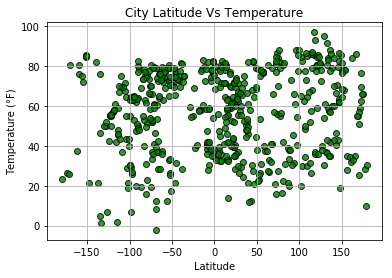

In [5]:
plt.scatter(lat, temp, color = "g", alpha = .80, marker = "o", edgecolor = "black")
plt.title("City Latitude Vs Temperature") 
plt.xlabel("Latitude")
plt.ylabel("Temperature (°F)")
plt.grid(True)
plt.savefig("Weather_images/City latitude Vs Temperature")

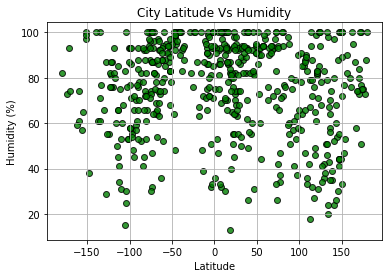

In [6]:
plt.scatter(lat, humidity, color = "g", alpha = .8, marker = "o", edgecolor = "black")
plt.title("City Latitude Vs Humidity") 
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.savefig("Weather_images/City latitude Vs Humidity")

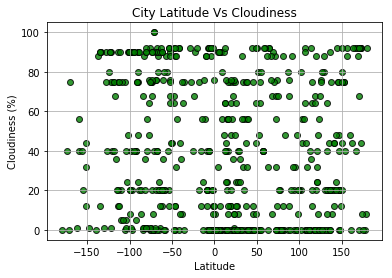

In [7]:
plt.scatter(lat, cloud, color = "g", alpha = .8, marker = "o", edgecolor = "black")   
plt.title("City Latitude Vs Cloudiness") 
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.savefig("Weather_images/City latitude Vs Cloudiness")

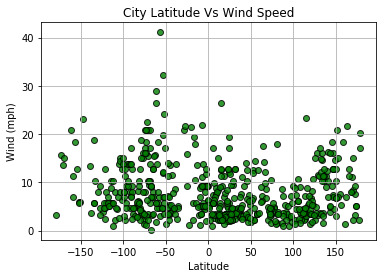

In [8]:
plt.scatter(lat, wind, color = "g", alpha = .8, marker = "o", edgecolor = "black")
plt.title("City Latitude Vs Wind Speed") 
plt.xlabel("Latitude")
plt.ylabel("Wind (mph)")
plt.grid(True)
plt.savefig("Weather_images/City Latitude Vs Wind")